# Trabajo Practico n° 1
### Grupo 27

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

#### Se cargan los datos

In [2]:
train=pd.read_csv('train.csv',encoding='latin-1')

In [3]:
#test=pd.read_csv('test.csv',encoding='utf-8')

In [4]:
sample = pd.read_csv('sample_submission.csv', encoding='latin-1')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
#test.info()

In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int64
 1   target  3263 non-null   int64
dtypes: int64(2)
memory usage: 51.1 KB


In [9]:
print(train.describe())
#print(test.describe())
print(sample.describe())

                        id               target
count             7,613.00             7,613.00
mean              5,441.93                 0.43
std               3,137.12                 0.50
min                   1.00                 0.00
25%               2,734.00                 0.00
50%               5,408.00                 0.00
75%               8,146.00                 1.00
max              10,873.00                 1.00
                        id               target
count             3,263.00             3,263.00
mean              5,427.15                 0.00
std               3,146.43                 0.00
min                   0.00                 0.00
25%               2,683.00                 0.00
50%               5,500.00                 0.00
75%               8,176.00                 0.00
max              10,875.00                 0.00


Por lo que veo que tanto los textos (tweets) como el target nunca son nill, aunque las keyword y las location si

In [10]:
print(train['keyword'].hasnans)
print(train['location'].hasnans)
print(train['target'].hasnans)
print(train['text'].hasnans)

True
True
False
False


In [11]:
train.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

#### Me fijo la distribución de tweets quese tratan de casos reales de las que no

In [12]:
target_total = train.target.value_counts()
target_total

0    4342
1    3271
Name: target, dtype: int64

Si es 0 (cero) el caso no es real; si es 1 (uno) es real

Text(0, 0.5, 'Cantidad de tweets')

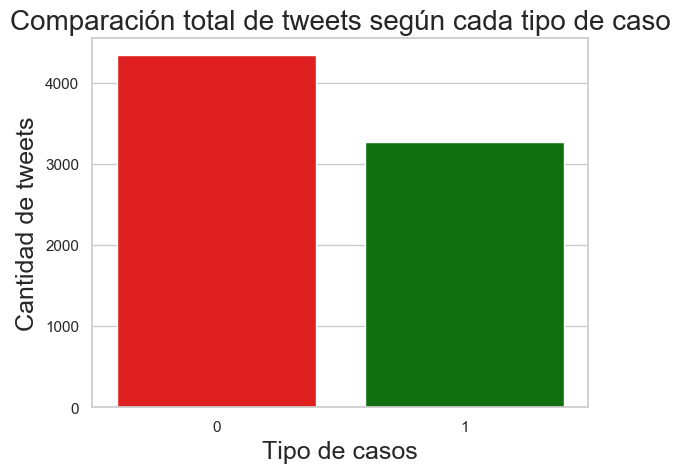

In [13]:
g = sns.barplot(x=target_total.index, y=target_total.values, orient='v', palette=['red','green'])
g.set_title(u"Comparación total de tweets según cada tipo de caso", fontsize=20)
g.set_xlabel(u"Tipo de casos", fontsize=18)
g.set_ylabel(u"Cantidad de tweets", fontsize=18)

Acá podemos ver que del total de tweets que tenemos en el dataframe el 57% de los tweets son de casos no reales y el 43% son de casos reales

### Analizamos los largos de cada tweet

In [14]:
con_len_tweets = train[['id','text','target']].copy()
con_len_tweets['len'] = con_len_tweets['text'].str.len()
con_len_tweets

,id,text,target,len
0,1,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,Forest fire near La Ronge Sask. Canada,1,38
2,5,All residents asked to 'shelter in place' are ...,1,133
3,6,"13,000 people receive #wildfires evacuation or...",1,65
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,Police investigating after an e-bike collided ...,1,137


Sabemos que cada tweet tiene un maximo de 280 caracteres

In [15]:
con_len_tweets['len'].describe()

count               7,613.00
mean                  101.46
std                    34.06
min                     7.00
25%                    78.00
50%                   107.00
75%                   134.00
max                   163.00
Name: len, dtype: float64

Podemos ver que el promedio de longitud de todos los tweets es aproximadamente de 101 caracteres.

Podemos ver que lso tweets que tienen entre aproximadamente 80 caracteres y 150 son en los que predominan los casos reales, en cambio cuando es menor a 75 caracteres y mayor a 150 caracteres la mayoría de tweets son de casos no reales

Text(0, 0.5, 'Densidad de tweets')

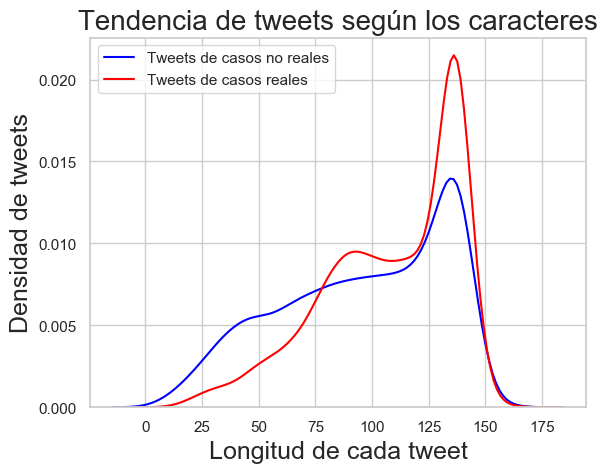

In [16]:
g = sns.distplot(con_len_tweets[con_len_tweets['target'] == 0]['len'], color='blue', label='Tweets de casos no reales', hist=False)
g = sns.distplot(con_len_tweets[con_len_tweets['target'] == 1]['len'], color='red', label='Tweets de casos reales', hist=False)

g.set_title(u"Tendencia de tweets según los caracteres", fontsize=20)
g.set_xlabel(u"Longitud de cada tweet", fontsize=18)
g.set_ylabel(u"Densidad de tweets", fontsize=18)

Analisis de las palabras mas frecuentes en todos los tweets

In [17]:
tweets=train.loc[:,['text']]['text'].transform(lambda palabras: palabras.lower()).value_counts()
tweets

11-year-old boy charged with manslaughter of toddler: report: an 11-year-old boy has been charged with manslaughter over the fatal sh...          10
he came to a land which was engulfed in tribal war and turned it into a land of peace i.e. madinah. #prophetmuhammad #islam                        6
the prophet (peace be upon him) said 'save yourself from hellfire even if it is by giving half a date in charity.'                                 6
#bestnaijamade: 16yr old pkk suicide bomber who detonated bomb in ... http://t.co/ksawlyux02 bestnaijamade bestnaijamade bestnaijamade beâã_     6
madhya pradesh train derailment: village youth saved many lives                                                                                    5
                                                                                                                                                  ..
advice from noah: dont go running in a thunderstorm                                                       

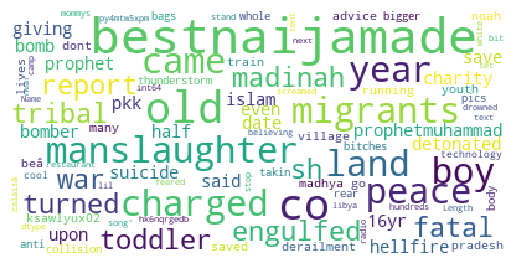

In [18]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(tweets))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Saco la cantidad de palabras usadas por tweet

In [74]:
words = train[['id','text','target']].copy()
words['cant_palabras'] = words['text'].apply(lambda x: len(x.split()))
words

,id,text,target,cant_palabras
0,1,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,Forest fire near La Ronge Sask. Canada,1,7
2,5,All residents asked to 'shelter in place' are ...,1,22
3,6,"13,000 people receive #wildfires evacuation or...",1,8
4,7,Just got sent this photo from Ruby #Alaska as ...,1,16
...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,Police investigating after an e-bike collided ...,1,19


Text(0.5, 0, 'Palabras por tweets')

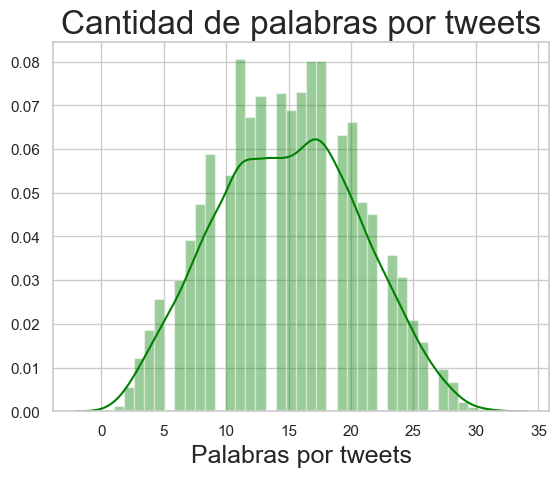

In [75]:
g = sns.distplot(words['cant_palabras'], color="green")
g.set_title("Cantidad de palabras por tweets", fontsize=24)
g.set_xlabel("Palabras por tweets", fontsize=18)

El total de registro de tweets es de 7613. Me fijo la localizaciones de cada tweets

In [19]:
# Saco la localización de cada tweet
localizacion = train['location'].value_counts().sort_values(ascending=False)
#localizacion = localizacion.rename(columns={'location': "total", 'index' : 'location'})
localizacion

USA                            104
New York                        71
United States                   50
London                          45
Canada                          29
                              ... 
Joshua Tree, CA                  1
Neath, South Wales               1
North East / Middlesbrough       1
Beautiful British Columbia       1
Hudson Valley, NY                1
Name: location, Length: 3341, dtype: int64

Vemos que el total de localizaciones es de 3341 tweets sobre los 7613 totales. Por lo que solo el 43% de los tweets tienen localización.

Text(0, 0.5, 'Localización')

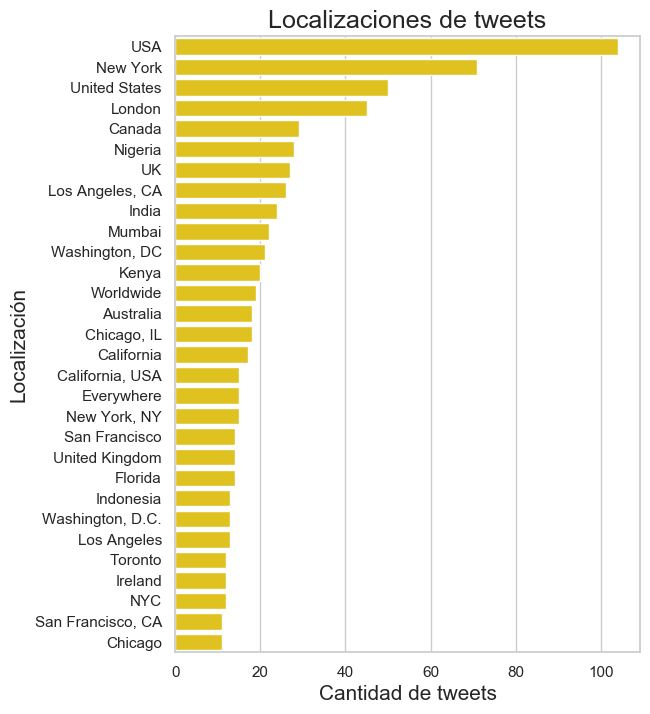

In [20]:
# Vamos a trabajar con las primeras 30 localizaciones
localizacion = localizacion.head(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x=localizacion.values, y=localizacion.index, orient='h', color='gold')
g.set_title(u"Localizaciones de tweets", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Localización", fontsize=15)

## VER de AGREGAR cantidad en cada barra de grafico ↑↑↑

Analizar keyword!!!

In [21]:
keyword=train[['keyword','target']].copy()

Analizo la cantidad de valores nulos que se tienen en la columna keywords

In [22]:
keyword['keyword'].isna().sum()

61

In [23]:
keyword.dropna(axis=0,inplace=True)

In [24]:
keyword.shape

(7552, 2)

Se eliminaron los keywords nulos, hacemos un análisis de la cantidad de tweets por keyword

In [25]:
keyword['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Como puede verse, hay 221 keywords únicos. Nos interesa saber cuáles son los 30 keywords que poseen la mayor cantidad de tweets

In [26]:
top_30_keywords=keyword['keyword'].value_counts().sort_values(ascending=False).head(30)

Text(0, 0.5, 'Keywords')

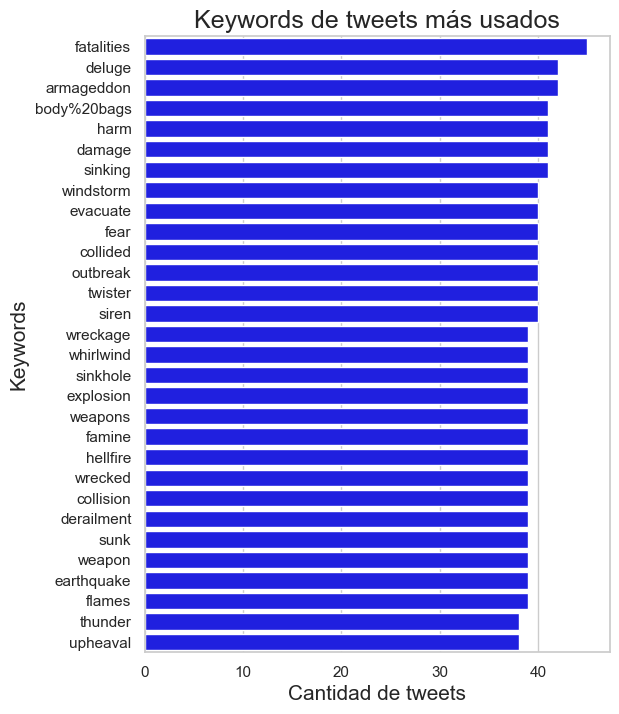

In [27]:
plt.figure(figsize=(6,8))
g = sns.barplot(x=top_30_keywords.values, y=top_30_keywords.index, orient='h', color='blue')
g.set_title(u"Keywords de tweets más usados", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

In [28]:
low_30_keywords=keyword['keyword'].value_counts().sort_values(ascending=False).tail(30)

Text(0, 0.5, 'Keywords')

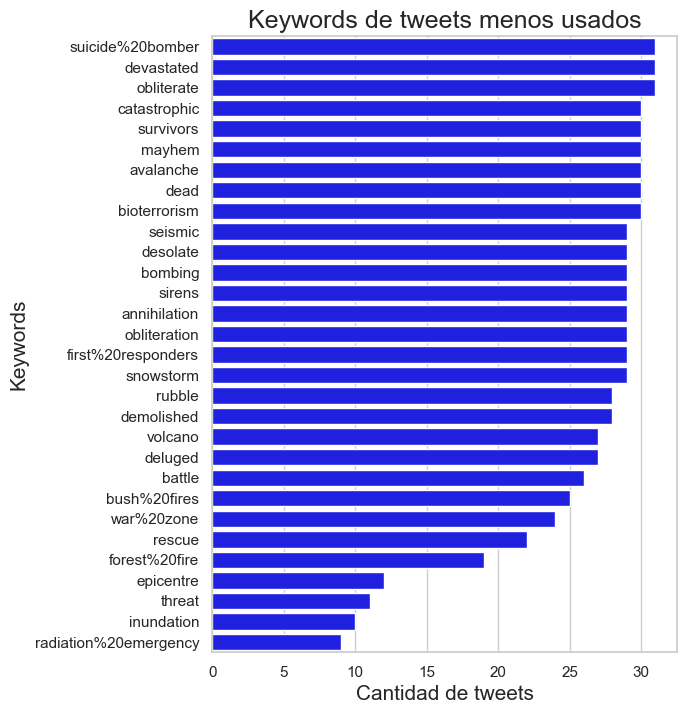

In [29]:
plt.figure(figsize=(6,8))
g = sns.barplot(x=low_30_keywords.values, y=low_30_keywords.index, orient='h', color='blue')
g.set_title(u"Keywords de tweets menos usados", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

Ahora que tenemos una idea de la cantidad de tweets por su keyword asociado, analizamos cuántos de esos tweets son verdaderos

In [30]:
keyword=keyword.groupby('keyword').agg('sum').sort_values('target',ascending=False)
keyword.rename(columns={"target":"cantidad de tweets"},inplace=True)

In [31]:
keyword.reset_index(inplace=True)

In [32]:
top_30_key_true=keyword.head(30)
top_30_key_true

,keyword,cantidad de tweets
0,derailment,39
1,wreckage,39
2,outbreak,39
3,typhoon,37
4,debris,37
5,oil%20spill,37
6,suicide%20bomb,32
7,rescuers,32
8,suicide%20bombing,32
9,evacuated,32


Text(0, 0.5, 'Keywords')

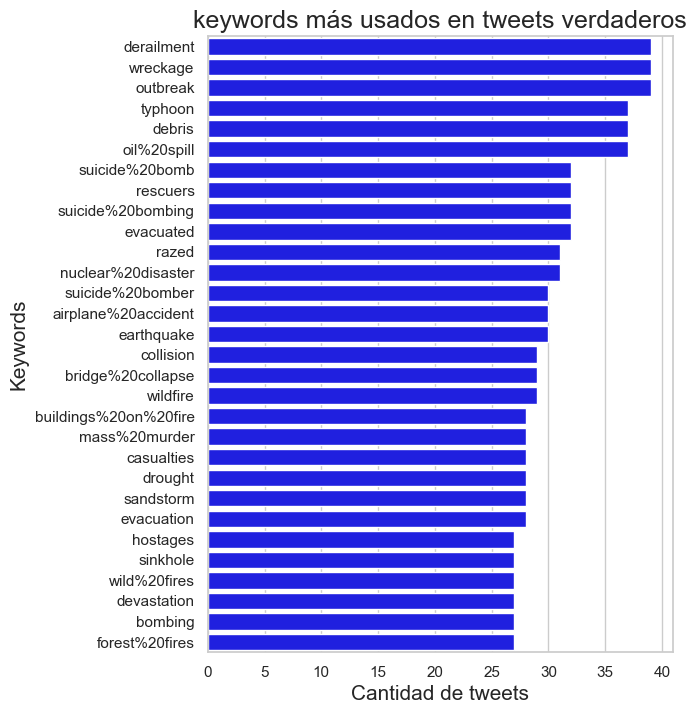

In [33]:
top_30_key_true=keyword.head(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x="cantidad de tweets", y="keyword", data=top_30_key_true, orient='h', color='blue')
g.set_title(u"keywords más usados en tweets verdaderos", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

Text(0, 0.5, 'Keywords')

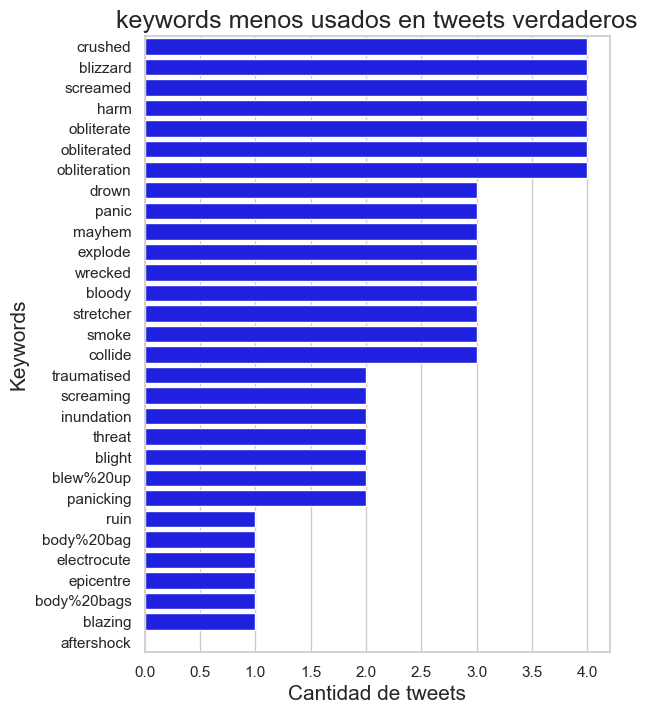

In [34]:
low_30_key_true=keyword.tail(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x="cantidad de tweets", y="keyword", data=low_30_key_true, orient='h', color='blue')
g.set_title(u"keywords menos usados en tweets verdaderos", fontsize=18)
g.set_xlabel(u"Cantidad de tweets", fontsize=15)
g.set_ylabel(u"Keywords", fontsize=15)

In [35]:
keyword_y_location=train[['keyword','location']].copy()
print(keyword_y_location['keyword'].isna().sum())
print(keyword_y_location['location'].isna().sum())

61
2533


In [36]:
#Elimino en donde ambas lineas tiene Nan en la columan keyword, por lo que quedan keyword activas pero sin localización exacta
keyword_y_location.dropna(how='any',inplace=True)
print(keyword_y_location['keyword'].isna().sum())
print(keyword_y_location['location'].isna().sum())

0
0


In [37]:
keyword_y_location['actividad']=1

In [38]:
keyword_y_location['keyword'].value_counts()

collision                36
whirlwind                33
armageddon               32
fatalities               32
flames                   31
                         ..
razed                    10
epicentre                 9
detonation                8
radiation%20emergency     6
inundation                5
Name: keyword, Length: 221, dtype: int64

In [42]:
#Agrupo por keyword y por localización y sumo el total de repeticiones
keyword_y_location_sum = keyword_y_location.groupby(['keyword','location'],as_index=False)['actividad'].sum()
keyword_y_location_sum

,keyword,location,actividad
0,ablaze,AFRICA,1
1,ablaze,Abuja,1
2,ablaze,Anaheim,1
3,ablaze,Barbados,1
4,ablaze,Birmingham,2
...,...,...,...
4652,wrecked,"Santa Cruz, CA",1
4653,wrecked,TN,1
4654,wrecked,United States,2
4655,wrecked,"Vancouver, Canada",1


Text(47.249999999999986, 0.5, 'Keyword')

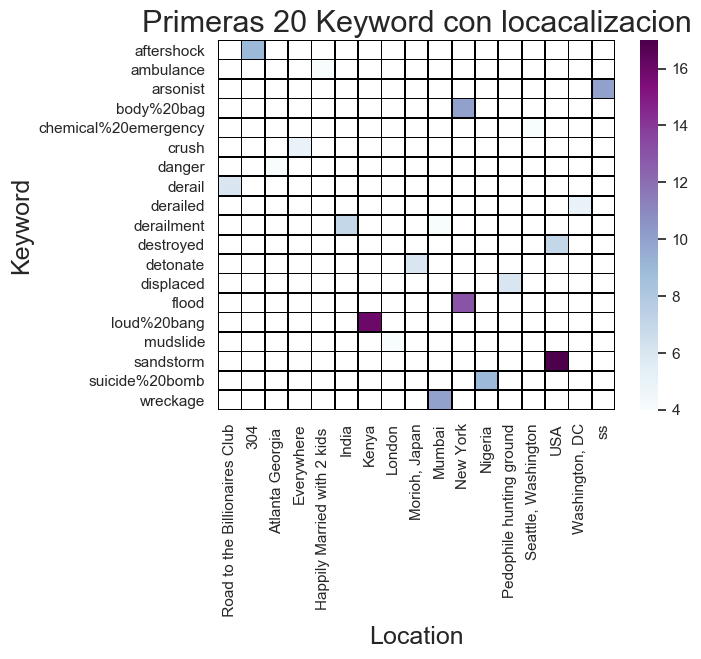

In [43]:
r = keyword_y_location_sum.sort_values(by=['actividad'],ascending=False)
for_heatmap= r.head(20).pivot_table(index='keyword', columns='location', values='actividad', aggfunc='sum')
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu",linecolor='black') # annot=True
g.set_title("Primeras 20 Keyword con locacalizacion", fontsize=22)
g.set_xlabel("Location",fontsize=18)
g.set_ylabel("Keyword", fontsize=18)

Podemos ver que solo en la localización USA hay dos palabras con dentro del top 20 de keywords. También se puede ver que hay localizaciones que no son ciudades o países, y tienen un numero bajo de repeticiones de la misma keyword, por lo que podemos pensar que es la misma persona o gente cercana a esta.